In [80]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats 
import statsmodels.api as sm

Consider following data generating scheme:
<p>
Parameters
<li> $N$ = sample size
<li> $p$ = probability of treatment
<li> $b$ = ATE (treatment effect)
</p>

<p>$Y_{pre}$ ~ Normal(1,1)</p>
<p>$A$ ~ Bernoulli(p)</p>
<p>$Y_{post}$ ~ Normal($b$*$A$ + $y_{pre}^2$, 1)

Run a simulation based on the following generated data as above and estimate the treatment effects using:
<li> Differences in means</li>
<li> Regression controlling for y_pre</li>
<li> CUPED controlling for y_pre</li>
<li> Difference in differences</li>

Repeat 10K times and assess bias and variance

## Coding CUPED

In [91]:
data = [100, 1000, 10000, 100000]
p = 0.1
b = 5


for i in data:
    Y_pre = np.random.normal(1, 1, i)
    A = np.random.binomial(1, p, i)
    Y_post = A*b  + np.square(Y_pre) + np.random.normal(0,1)

    simulation = pd.DataFrame({'Y_pre':Y_pre, 'Treatment':A, 'Y_post':Y_post})

    treatment = simulation[simulation['Treatment'] == 1]
    control = simulation[simulation['Treatment'] == 0]

    t_mu = treatment['Y_post'].mean()
    c_mu = control['Y_post'].mean()
    print("for N = {}".format(i))



    print("difference in means:")
    mu_diff = t_mu - c_mu
    print(mu_diff)
    print()
    
    
    alpha = 0.05
    X = simulation.iloc[:, :2].values
    Y = simulation['Y_post'].values

    model_lr = sm.OLS(Y, sm.add_constant(X)).fit()
    conf_interval = model_lr.conf_int(alpha)
    b_conf_int = conf_interval[-1]

    #check that coef of our treatment effect, should return  b
#     b_hat = model.coef_[1]
    print("regression controlled treatment effect")
#     print(model_lr.summary())
    print(model_lr.params[-1])
    print(b_conf_int)
    print()
    
    

for N = 100
difference in means:
5.389827067664925

regression controlled treatment effect
4.583479301850007
[3.8094887 5.3574699]

for N = 1000
difference in means:
4.835611758875306

regression controlled treatment effect
4.913109633558288
[4.60343011 5.22278916]

for N = 10000
difference in means:
4.963431657829071

regression controlled treatment effect
5.023395429382271
[4.92940016 5.1173907 ]

for N = 100000
difference in means:
4.996095075895667

regression controlled treatment effect
5.003154622050116
[4.9738759  5.03243334]



In [95]:
import matplotlib.pyplot as plt

(array([50064.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49936.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

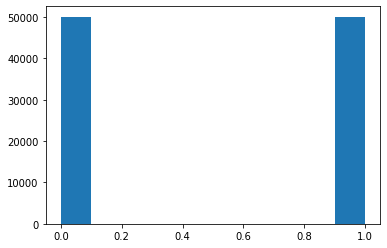

In [100]:
p = 1/(1 + np.exp(1 - Y_pre))
A = np.random.binomial(1, p, i)
plt.hist(A)

In [101]:
np.sum(A)

49936

In [102]:
len(A)

100000